In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

sns.set_theme()

def distance(col1, col2):
    max_k: int = max(max(col1), max(col2)) + 1
    same_color = [[0] * max_k for _ in range(max_k)]
    for vertex in range(len(col1)):
        same_color[col1[vertex]][col2[vertex]] += 1
    corresponding_color = [0] * max_k

    proxi = 0

    for c in range(max_k):
        max_val = -1
        max_c1 = -1
        max_c2 = -1
        for c1 in range(max_k):
            max_val_tmp = max(same_color[c1])
            if max_val_tmp > max_val:
                max_val = max_val_tmp
                max_c1 = c1
                max_c2 = same_color[c1].index(max_val_tmp)
        corresponding_color[max_c1] = max_c2
        proxi += max_val
        same_color[max_c1] = [-1] * max_k
        for i in range(max_k):
            same_color[i][max_c2] = -1
    return len(col1) - proxi



In [2]:
from sklearn import manifold

data = pd.read_csv("gcp_DSJC500.5_tabu_col_dist.csv")[["solution"]][::10000]
x = data["solution"].to_numpy()
x = [list(map(int, s.split(":"))) for s in x]
nb_sols = len(x)
print(nb_sols)
dists = {}
matrix = [[0] * nb_sols for _ in range(nb_sols)]
for i in range(nb_sols):
    for j in range(i + 1, nb_sols):
        matrix[i][j] = matrix[j][i] = distance(x[i], x[j])


100


/home/user/Documents/phd/code/gc_wvcp_adaptive_mcts/venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/home/user/Documents/phd/code/gc_wvcp_adaptive_mcts/venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


5978972.7966663595
[[ 9.50139400e+01  6.18447384e+02  5.20976101e+02]
 [ 9.70121954e+01  6.87025050e+02  5.12418227e+02]
 [-1.29310163e+00  6.24989527e+02  5.35497531e+02]
 [-2.42397071e+01  7.13280234e+02  5.04103164e+02]
 [ 2.26454444e+01  7.35278960e+02  5.15471959e+02]
 [-1.70422422e+01  7.85025027e+02  4.32775818e+02]
 [-1.06749103e+02  6.39732954e+02  3.46730221e+02]
 [-3.47050771e+01  7.76852935e+02  3.20386758e+02]
 [-9.76948491e+00  7.53870411e+02  2.65094556e+02]
 [-1.32701986e+02  5.90570195e+02  1.37811652e+02]
 [-1.37607336e+02  5.69638738e+02  1.67463215e+02]
 [-2.07559728e+02  4.51410614e+02  1.08038429e+02]
 [-2.61537530e+02  4.05087871e+02  4.98691075e+01]
 [-2.55305801e+02  4.55965195e+02  3.64963077e+01]
 [-2.46032916e+02  4.31723009e+02 -9.58738938e+00]
 [-2.25424908e+02  4.57586994e+02 -7.61202520e+00]
 [-1.78069690e+02  4.74623045e+02  1.46411340e+01]
 [-2.46419439e+02  5.03061728e+01  1.24903204e+02]
 [-1.89983052e+02  1.57112367e+02  1.92048785e+02]
 [-1.6687424

AttributeError: 'Axes3D' object has no attribute 'scatter3d'

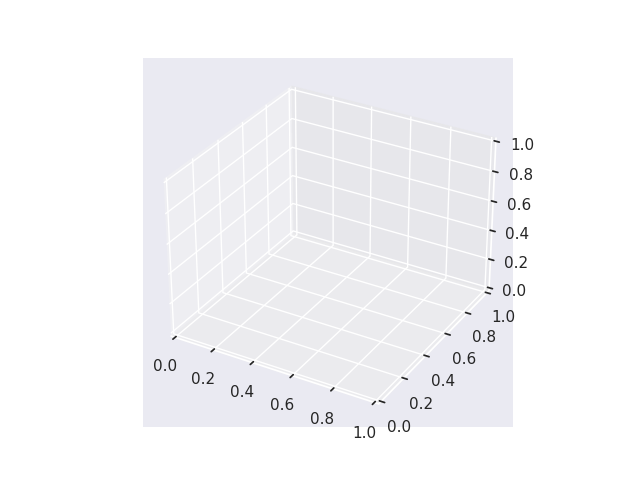

In [3]:
# pip install ipympl
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

# plot 3D MDS
# mds = manifold.MDS(n_components=3, dissimilarity="euclidean",normalized_stress=True, metric=False)
mds = manifold.MDS(n_components=3, dissimilarity="euclidean")

results = mds.fit(matrix)
print(mds.stress_)
coords = results.embedding_
print(coords)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3d(coords[:, 0], coords[:, 1], coords[:, 2], color=sns.color_palette("rocket", len(x)))
plt.show()


In [4]:
import plotly
import plotly.graph_objs as go


trace = go.Scatter3d(
    x=coords[:, 0],
    y=coords[:, 1],
    z=coords[:, 2],
    mode="markers",
    marker={
        "size": 10,
        "opacity": 0.8,
        "color":sns.color_palette("rocket", len(x))
    },
)

# Configure the layout.
layout = go.Layout(margin={"l": 0, "r": 0, "b": 0, "t": 0})

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)


In [5]:
plot_figure.write_html("landscape_gcp.html")

In [ ]:
for l in matrix:
    for i in l:
        print(i, end=" ")
    print()